#Predictive Analytics - Prediksi Harga Mobil Ford

##Import Library yang Diperlukan

In [152]:
%cd /content/drive/MyDrive/Dicoding_Machine_Learning_3/Submission1

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

/content/drive/MyDrive/Dicoding_Machine_Learning_3/Submission1


##Import Dataset

In [169]:
df = pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [119]:
df.shape

(17966, 9)

##Deskripsi Variabel / Features

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [121]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [122]:
print((df.tax == 0).sum())

2153


####Ternyata beberapa mobil ford memang ada yang memiliki pajak 0 dollar, jadi ini bukan merupakan sebuah missing value

In [123]:
df.loc[(df.tax==0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
12,Fiesta,2017,11000,Manual,20978,Petrol,0,65.7,1.0
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
30,Fiesta,2016,7999,Manual,60730,Diesel,0,78.5,1.5
33,Fiesta,2013,7236,Manual,39090,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17877,Fiesta,2015,6900,Manual,37000,Petrol,0,65.7,1.0
17938,Fiesta,2015,8499,Manual,9264,Petrol,0,65.7,1.0
17942,Focus,2015,8000,Manual,65000,Diesel,0,74.3,1.5
17946,Fiesta,2015,8999,Manual,24546,Petrol,0,65.7,1.0


##Melihat sebaran data dengan boxplot

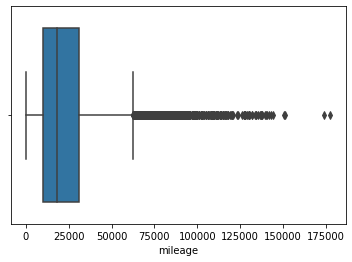

In [124]:
sns.boxplot(x=df['mileage'])

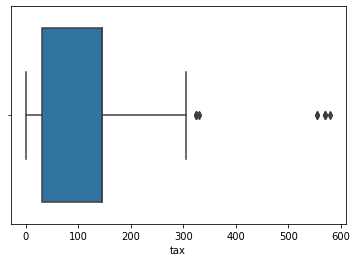

In [10]:
sns.boxplot(x=df['tax'])

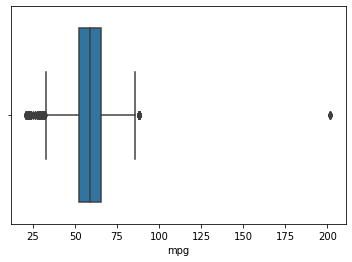

In [11]:
sns.boxplot(x=df['mpg'])

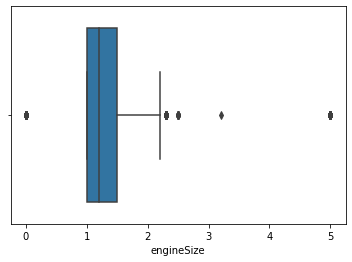

In [13]:
sns.boxplot(x=df['engineSize'])

###Karena terdapat beberapa outlayer dalam data maka data yang memiliki outlayer akan dihapus

In [170]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1
carData = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
carData.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(16448, 9)

##Univariate Analysis

###Pisahkan variabel numerik dan kategorikal

In [171]:
num_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
cat_features = ['model', 'transmission', 'fuelType']

###Analisa jumlah sampel data

                        jumlah sampel  persentase
 Fiesta                          6198        37.7
 Focus                           4171        25.4
 Kuga                            2065        12.6
 EcoSport                        1132         6.9
 Ka+                              526         3.2
 C-MAX                            493         3.0
 Mondeo                           360         2.2
 B-MAX                            339         2.1
 S-MAX                            236         1.4
 Grand C-MAX                      234         1.4
 Galaxy                           187         1.1
 Edge                             152         0.9
 KA                               148         0.9
 Puma                              73         0.4
 Grand Tourneo Connect             56         0.3
 Tourneo Custom                    46         0.3
 Tourneo Connect                   30         0.2
 Transit Tourneo                    1         0.0
Focus                               1         0.0


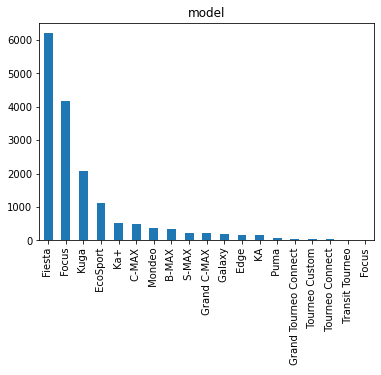

In [172]:
model = cat_features[0]
count = carData[model].value_counts()
percent = 100*carData[model].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=model)

###Hapus model yang memiliki jumlah sampel terlalu sedikit(0.2 persen kebawah)

In [173]:
carData.model.replace([' Tourneo Connect', ' Transit Tourneo', 'Focus'], ['other', 'other', 'other'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


                        jumlah sampel  persentase
 Fiesta                          6198        37.7
 Focus                           4171        25.4
 Kuga                            2065        12.6
 EcoSport                        1132         6.9
 Ka+                              526         3.2
 C-MAX                            493         3.0
 Mondeo                           360         2.2
 B-MAX                            339         2.1
 S-MAX                            236         1.4
 Grand C-MAX                      234         1.4
 Galaxy                           187         1.1
 Edge                             152         0.9
 KA                               148         0.9
 Puma                              73         0.4
 Grand Tourneo Connect             56         0.3
 Tourneo Custom                    46         0.3
other                              32         0.2


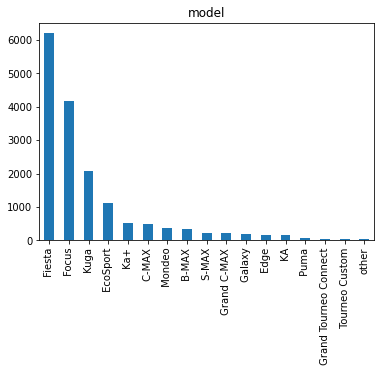

In [158]:
model = cat_features[0]
count = carData[model].value_counts()
percent = 100*carData[model].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=model)

           jumlah sampel  persentase
Manual             14303        87.0
Automatic           1149         7.0
Semi-Auto            996         6.1


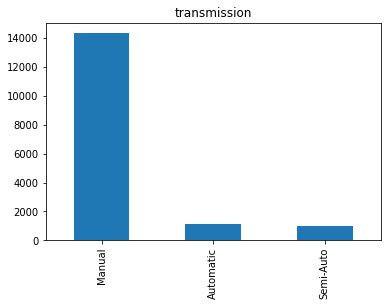

In [159]:
transmission = cat_features[1]
count = carData[transmission].value_counts()
percent = 100*carData[transmission].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=transmission)

          jumlah sampel  persentase
Petrol            11477        69.8
Diesel             4960        30.2
Hybrid                8         0.0
Electric              2         0.0
Other                 1         0.0


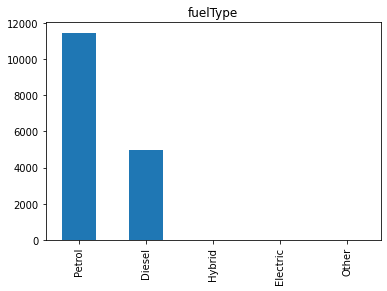

In [160]:
fueltype = cat_features[2]
count = carData[fueltype].value_counts()
percent = 100*carData[fueltype].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=fueltype)

###Hapus fueltype yang memiliki jumlah sampel terlalu sedikit(0.2 persen kebawah)

In [174]:
carData.fuelType.replace(['Hybrid', 'Electric',], ['Other', 'Other'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


        jumlah sampel  persentase
Petrol          11477        69.8
Diesel           4960        30.2
Other              11         0.1


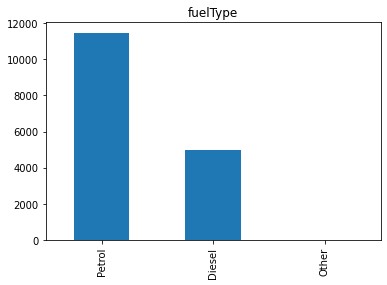

In [162]:
fueltype = cat_features[2]
count = carData[fueltype].value_counts()
percent = 100*carData[fueltype].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=fueltype)

##Hasil pemetaan data numerical

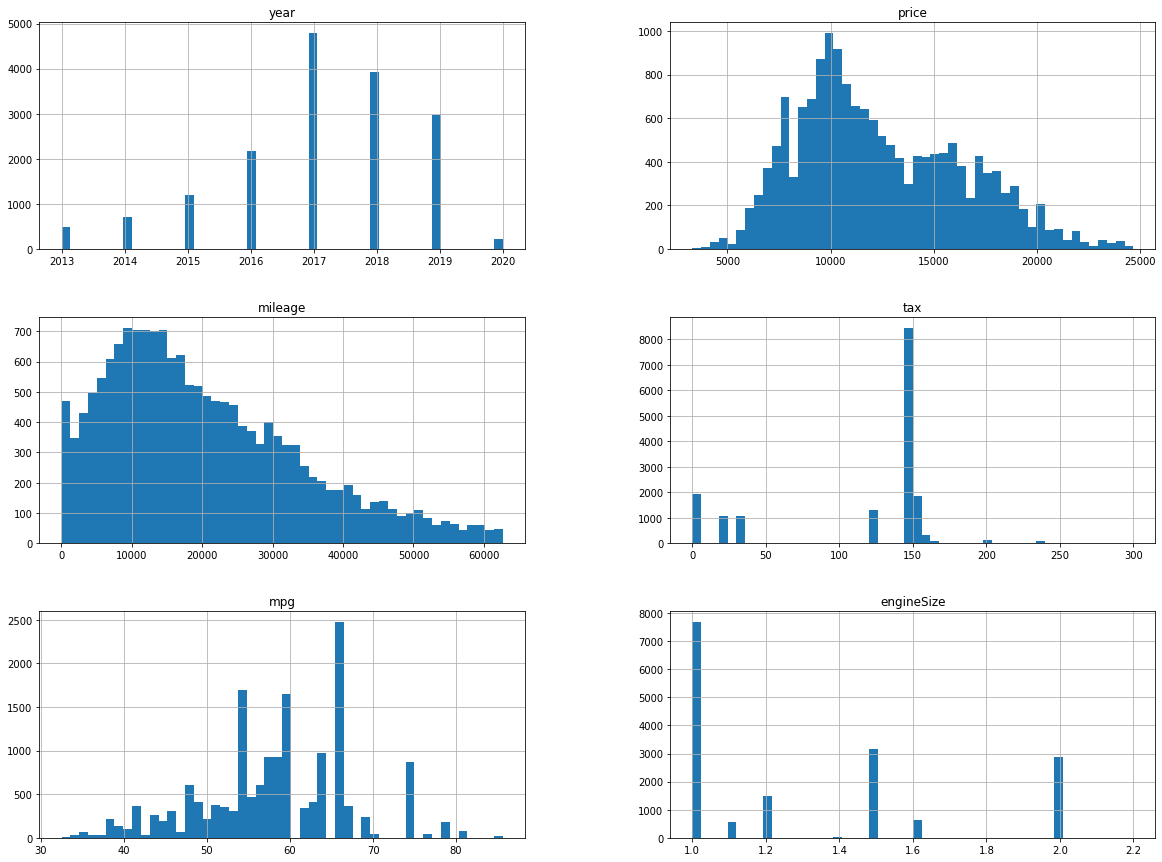

In [163]:
carData.hist(bins=50, figsize=(20,15))
plt.show()

###Hubungan data kategorikal dengan harga

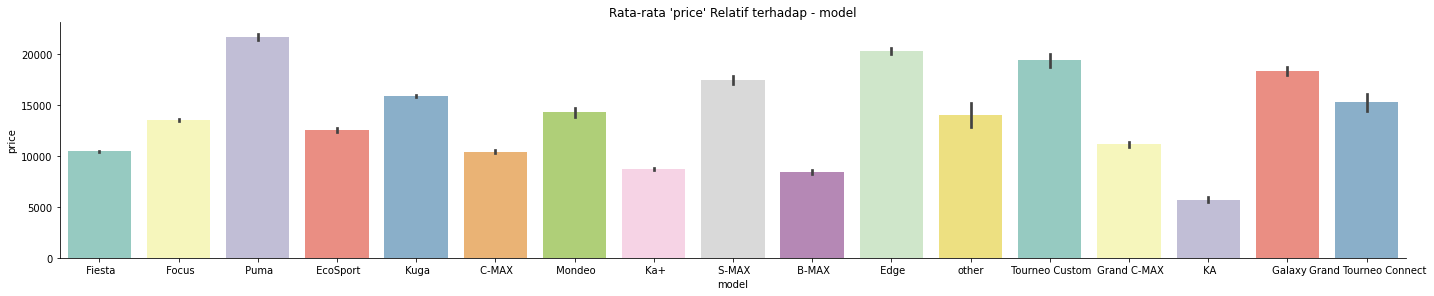

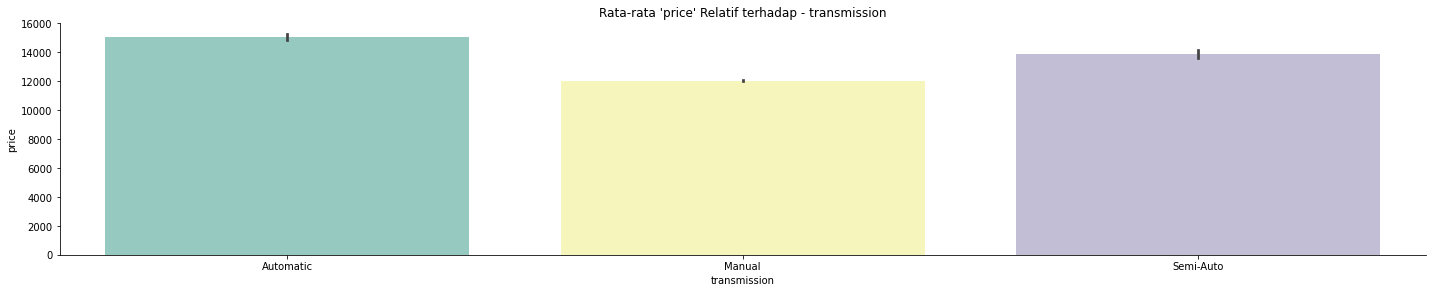

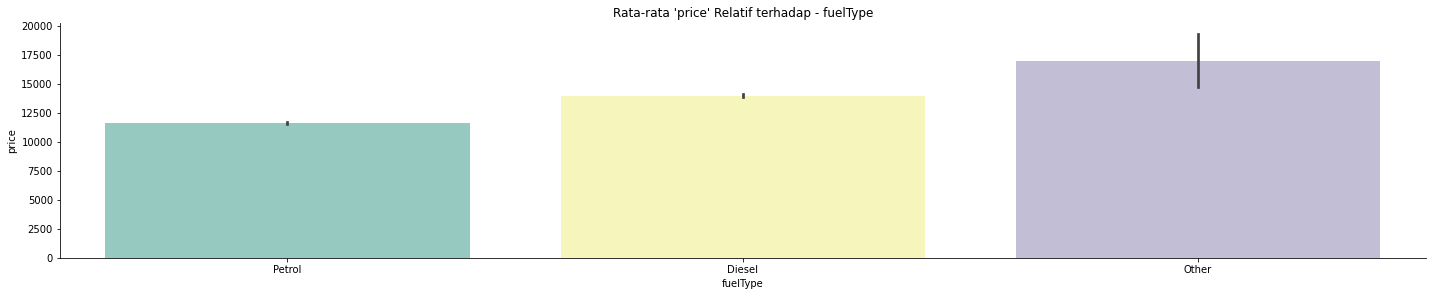

In [144]:
category_features = carData.select_dtypes(include='object').columns.to_list()
 
for col in category_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 5,  data=carData, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

###Hubungan data numerikal dengan harga

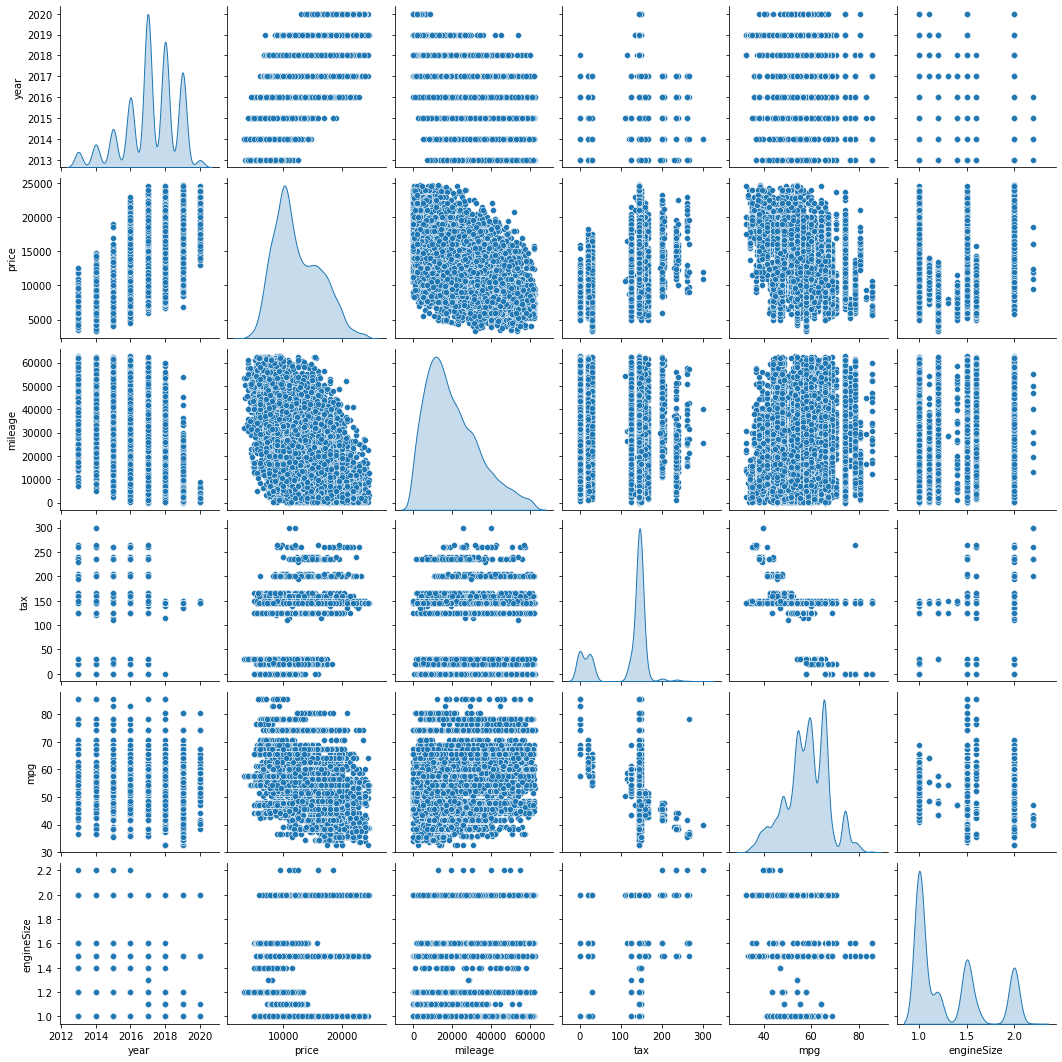

In [81]:
sns.pairplot(carData, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix ')

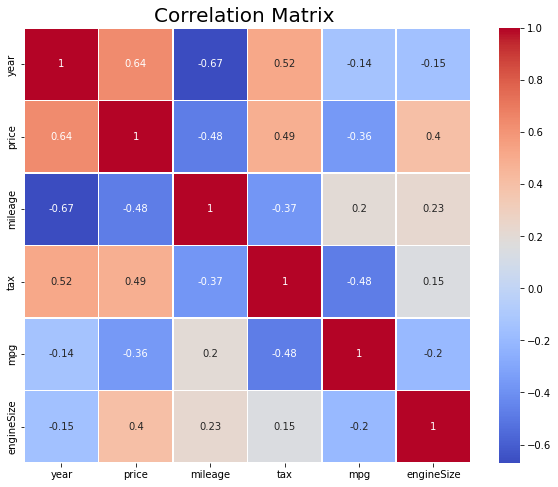

In [82]:
plt.figure(figsize=(10, 8))
correlation_matrix = carData.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix ", size=20)

##Data preparation

In [145]:
carData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         16448 non-null  object 
 1   year          16448 non-null  int64  
 2   price         16448 non-null  int64  
 3   transmission  16448 non-null  object 
 4   mileage       16448 non-null  int64  
 5   fuelType      16448 non-null  object 
 6   tax           16448 non-null  int64  
 7   mpg           16448 non-null  float64
 8   engineSize    16448 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.8+ MB


In [146]:
carData.describe()

,year,price,mileage,tax,mpg,engineSize
count,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000,16448.000000
mean,2017.114847,12363.672240,20336.055265,113.119042,58.242729,1.316652
std,1.530264,3957.188108,13756.226101,59.107733,8.978561,0.375388
min,2013.000000,3295.000000,1.000000,0.000000,32.500000,1.000000
25%,2016.000000,9450.000000,9825.500000,125.000000,53.300000,1.000000
50%,2017.000000,11498.000000,17375.500000,145.000000,58.900000,1.100000
75%,2018.000000,15299.250000,28860.000000,145.000000,65.700000,1.500000
max,2020.000000,24690.000000,62664.000000,300.000000,85.600000,2.200000


###Membuat klasifikasi berdasarkan harga

###1 = Very Cheap, 2 = Cheap, 3 = Expensive, 4 = Very Expensive 

In [175]:
carData.loc[carData.price.astype(int) < 9450, 'price'] = 1
carData.loc[(carData.price.astype(int) >= 9450) & (carData.price.astype(int) < 11498), 'price'] = 2
carData.loc[(carData.price.astype(int) >= 11498) & (carData.price.astype(int) < 15299), 'price'] = 3
carData.loc[carData.price.astype(int) >= 15299, 'price'] = 4
carData.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,3,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,3,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,3,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,4,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,4,Automatic,1482,Petrol,145,48.7,1.0


###One hot-encoding

In [176]:
from sklearn.preprocessing import  OneHotEncoder
carData = pd.concat([carData, pd.get_dummies(carData['model'], prefix='model')],axis=1)
carData = pd.concat([carData, pd.get_dummies(carData['transmission'], prefix='transmission')],axis=1)
carData = pd.concat([carData, pd.get_dummies(carData['fuelType'], prefix='fuelType')],axis=1)
carData.drop(['model', 'transmission', 'fuelType'], axis=1, inplace=True)
carData.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Puma,model_ S-MAX,model_ Tourneo Custom,model_other,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Other,fuelType_Petrol
0,2017,3,15944,150,57.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2018,3,9083,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2017,3,12456,150,57.7,1.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2019,4,10460,145,40.3,1.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,2019,4,1482,145,48.7,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


###Split data (80:20)

In [177]:
from sklearn.model_selection import train_test_split
 
X = carData.drop(["price"],axis =1)
y = carData["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [178]:
X_test

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Fiesta,...,model_ Puma,model_ S-MAX,model_ Tourneo Custom,model_other,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Other,fuelType_Petrol
12957,2017,45002,150,53.3,1.0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
17126,2016,30208,20,60.1,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
15558,2015,46794,125,54.3,1.2,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
15495,2018,11704,145,55.4,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
14962,2017,27415,125,60.1,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,2019,8237,145,58.9,1.0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3097,2017,21000,125,60.1,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
10925,2019,8310,145,48.7,1.0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4541,2018,5071,145,41.5,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [180]:
y_train

6762     2
4791     3
11877    4
6187     2
15063    3
        ..
13976    1
7053     2
9957     1
10215    4
11467    4
Name: price, Length: 13158, dtype: int64

###Standarisasi

In [181]:
from sklearn.preprocessing import StandardScaler
 
dataToStandarization = ['mileage', 'tax', 'mpg']
scaler = StandardScaler()
scaler.fit(X_train[dataToStandarization])
X_train[dataToStandarization] = scaler.transform(X_train.loc[:, dataToStandarization])
X_train[dataToStandarization].head()

,mileage,tax,mpg
6762,0.168012,0.537786,-0.320176
4791,-0.178702,-1.411469,-0.442690
11877,-1.252413,0.537786,1.784846
6187,-1.148297,0.537786,0.659940
15063,0.336293,0.792036,-1.411669


In [182]:
X_train[dataToStandarization].describe().round(4)

,mileage,tax,mpg
count,13158.0000,13158.0000,13158.0000
mean,0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000
min,-1.4762,-1.9200,-2.8707
25%,-0.7599,0.1988,-0.4427
50%,-0.2191,0.5378,0.0696
75%,0.6236,0.5378,0.8270
max,3.0671,3.1650,3.0434


##Model Development

###Kita akan mencoba training menggunakan KNN, Random Forest dan Boost alhoritm

In [183]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

###KNN

In [210]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=12)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

###Random Forest

In [211]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=100, max_depth=72, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)      

###Booster

In [207]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.001, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

##Evaluasi Model

In [193]:
num_features = ['mileage', 'tax', 'mpg']

In [194]:
X_test.loc[:, num_features] = scaler.transform(X_test[num_features])

In [212]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

mse

,train,test
KNN,0.132437,0.154165
RF,0.025464,0.173635
Boosting,0.499552,0.485641


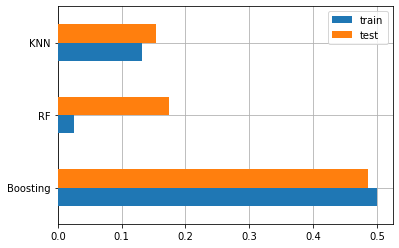

In [213]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [215]:
prediksi = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(0)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
12957,1,2.0,2.0,2.0
17126,2,2.0,2.0,2.0
15558,1,1.0,1.0,1.0
15495,4,4.0,4.0,4.0
14962,4,4.0,4.0,3.0
9374,4,4.0,4.0,4.0
3691,4,4.0,4.0,4.0
5059,2,2.0,2.0,2.0
4850,1,1.0,1.0,1.0
4590,4,4.0,4.0,4.0
